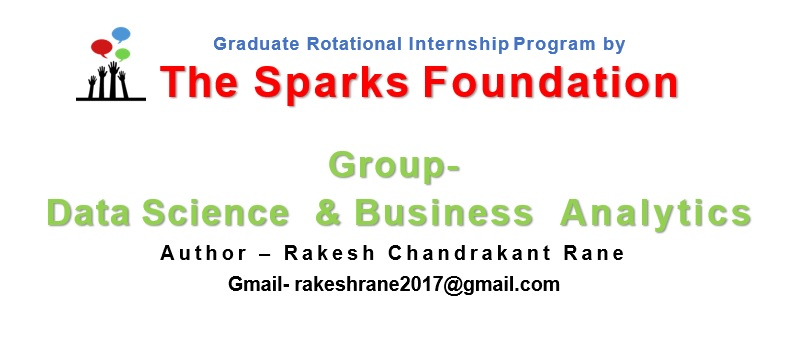

## Task2 - Prediction using Unsupervised ML

## Problem Statement :-
### From the given ‘Iris’ dataset, predict the optimum number of clusters  and represent it visually.


# 1) Data processing and visulization

In [1]:
# import all library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Laoding Iris dataset
iris = pd.read_csv('Iris.csv')
iris_df = iris.iloc[:,1:6]  # select feature column 
iris_df.head() # showing fist 5 rows from data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# 2) finding Minimum NO of Clusters


In [3]:
from sklearn.cluster import KMeans # import a library

X = iris_df.iloc[:,[0,1,2,3]].values # converting dataframe into array

inertias = [] # It is the sum of squared distances of samples to their closest cluster center.

K = range(1,10) # randomly initailize a cluster range

for k in K:
    # building and fitting model
    KmeanModel = KMeans(n_clusters = k)
    KmeanModel.fit(X)
    inertias.append(KmeanModel.inertia_)
    

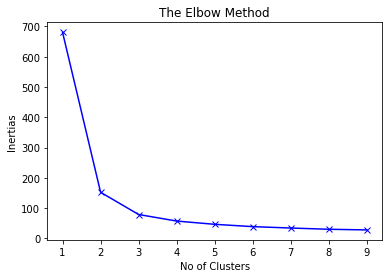

In [4]:
# plotting a inertias into line to observe elbow model
plt.plot(K,inertias, 'bx-')
plt.title('The Elbow Method')
plt.xlabel('No of Clusters')
plt.ylabel('Inertias')
plt.show()

###       To determine the optimal number of clusters, we have to select the value of k at the “elbow” ie the point after which the inertia start decreasing in a linear fashion. Thus for the given data, I conclude that the optimal number of clusters for the data is 3.

# 3) KMeans Classifer 

In [5]:
# Building a Kmeans classifer
KmeanModel = KMeans(n_clusters = 3)
label = KmeanModel.fit_predict(X)
label

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

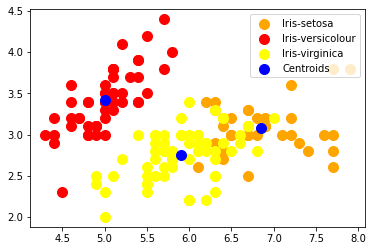

In [6]:
filtered_label0 = X[label == 0]
filtered_label1 = X[label == 1]
filtered_label2 = X[label == 2]

# plotting the results
plt.scatter(filtered_label0[:,0],filtered_label0[:,1],s=100, c ='orange', label = 'Iris-setosa' )
plt.scatter(filtered_label1[:,0],filtered_label1[:,1],s=100, c= 'red',label = 'Iris-versicolour')
plt.scatter(filtered_label2[:,0],filtered_label2[:,1], s =100,c= 'yellow',label = 'Iris-virginica')
plt.scatter (KmeanModel.cluster_centers_[:,0],KmeanModel.cluster_centers_[:,1],s= 100, c= 'blue', label = 'Centroids')
plt.legend(loc =1 )
plt.show()

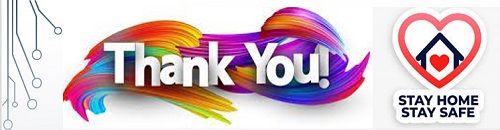